### 6.1 박스 필터와 양방향 필터

#### 박스 필터링
* dst = cv2.boxFilter(src, ddepth, ksize, dst, anchor, normalize, borderType)
* ddepth: 출력 영상의 dtype (-1: 입력 영상과 동일)
* ksize: 필터크기 튜플형식 (7, 7)
* dst: 출력 영상
* anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용
* normalize(optional): 커널 크기로 정규화(1/ksize²) 지정 여부 (Boolean), default=True
* borderType: 가장자리 픽셀 확장 방식<br><br>

#### 양방향 필터
* 가우시안 필터를 양쪽 방향으로 두번 한다고해서 이름이 붙여졌습니다.
* 평균 값 필터 또는 가우시안 필터는 에지 부근에서도 픽셀 값을 평탄하게 만드는 단점
* 양방향 필터는 기준 픽셀과 이웃 픽셀과의 거리, 그리고 픽셀 값의 차이를 함께 고려하여 블러링 정도를 조절
* cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace [, dst [, borderType]]) [] : 생략 가능
* src : 입력 영상
* d : 필터링에 사용될 이웃 픽셀의 거리(지름) 음수(-1) 입력 시 sigmaSpace 값에 의해 자동 결정(추천)
* sigmaColor : 색 공간에서 필터의 표준 편차(너무 크면 에지 부분을 구분하지 못합니다)
* sigmaSpace : 좌표 공간에서 필터의 표준 편차(가우시안 필터에서 시그마와 비슷합니다) 값이 클수록 연산 시간이 길어집니다.
* sigmaSpace를 엄청 크게 줘도 sigmaColor 값이 작다면 큰 변화가 없네요. 서로 값을 바꿔보면서 해보세요
* dst : 출력 영상
* borderType : 가장자리 픽셀 처리 방식

In [ ]:
import cv2
import numpy as np

src = cv2.imread('c:/data/test_bone.png', cv2.IMREAD_GRAYSCALE)

# 박스 필터링

dst1 = cv2.boxFilter(src, ddepth = -1, ksize = (11, 11))
dst2 = cv2.boxFilter(src, ddepth = -1, ksize = (21, 21))

# 양방향 필터

dst3 = cv2.bilateralFilter(src, d = 1, sigmaColor = 10, sigmaSpace = 10)
dst4 = cv2.bilateralFilter(src, d = -1, sigmaColor = 10, sigmaSpace = 10)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)
cv2.waitKey()
cv2.destroyAllWindows()

### 6.2 미디안, 블러, 가우시안

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

sig1, sig2 = 1.0, 10.0

src = cv2.imread('c:/data/blackpepper.PNG', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize =(15, 15))
fig.canvas.manager.set_window_title('plt')

dst1 = cv2.medianBlur(src, ksize=7)
dst2 = cv2.blur(src, ksize=(7, 7))
dst3 = cv2.GaussianBlur(src, ksize = (7, 7), sigmaX = sig1)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX = sig2)

ax[0][0].axis('off')
ax[0][0].imshow(dst1, cmap='gray')
ax[0][0].set_title('medianBlur')

ax[0][1].axis('off')
ax[0][1].imshow(dst2, cmap='gray')
ax[0][1].set_title('Blur')

ax[1][0].axis('off')
ax[1][0].imshow(dst3, cmap='gray')
ax[1][0].set_title(f'GaussianBlur sigmaX = {sig1}')

ax[1][1].axis('off')
ax[1][1].imshow(dst1, cmap='gray')
ax[1][1].set_title(f'medianBlur sigmaX = {sig2}')
plt.show()

# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

### 6.3 Sobel 필터 1

#### cv2.Sobel(src, ddept, dx, dy , ksize)
* src: 이미지 데이터 
* ddept: 출력 이미지 타입
* dx, dy: 각방향 미분 차수이다. 1, 0이면 x방향으로 미분한다는 뜻이다. 
* ksize: 커널의 크기를 의미한다. 3이면 3*3을 뜻합니다. <br><br>

* cv2.magnitude(gx, gy) / 2D 벡터의 크기 계산
* minval, maxval, minLoc, maxLoc = cv2.minMaxLoc(mag) / 최대 최소 구하기

In [ ]:
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

#1
# gx, gy 계산
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3) # x에 대한 미분
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3) # y에 대한 미분

#2
# gx의 제곱근 계산, cv2.nomalize()를 이용해 최소값을 0, 최대값을 255로 dstX에 정규화
dstX = cv2.sqrt(np.abs(gx)) # 편미분, 루트
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3 gy의 제곱근 계산, cv2.nomalize()를 이용해 최소값을 0, 최대값을 255로 dstY에 정규화
dstY = cv2.sqrt(np.abs(gy)) # 편미분, 루트
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
# cv2.magnitude()를 이용해 그래디언트 계산, mag의 값이 큰 화소가 에지
# x방향 미분과 y방향 미분을 따로 계산하고 벡터라는 것으로 묶은 것이 그래디언트
mag = cv2.magnitude(gx, gy) # 2D 백터의 크기 계산
minval, maxval, minLoc, maxLoc = cv2.minMaxLoc(mag) # 최대 최소 구하는 함수
print(minval, maxval, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src', src) # 입력영상
cv2.imshow('dstX', dstX)
cv2.imshow('dstY', dstY)
cv2.imshow('dstM', dstM)
cv2.waitKey()
cv2.destroyAllWindows()

### 6.4 Sobel 필터2: 에지 그래디언트 방향

0.0 359.8861083984375 (0, 0) (357, 120)


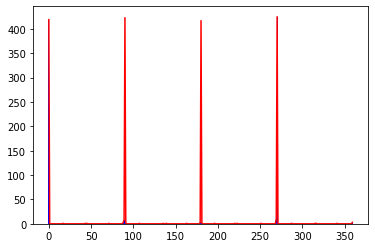

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True) # 2D 벡터의 크기와 각도
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle) # 각도의 최소, 최대값 구하기
print(minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY) # 임계값이 100인 이진 영상 edge 계산
edge = edge.astype(np.uint8) # 화소 자료형을 np.unit8로 변환
cv2.imshow('edge', edge)

#3
height, width = mag.shape[:2]
angleM = np.full((height, width, 3), (255, 255, 255), dtype=np.uint8) # 배경이 흰색인 3채널 컬러영상
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0:
            if angle[y, x] == 0: # 각도 0, red
                angleM[y, x] = (0, 0, 255)
            elif angle[y, x] == 90: # 각도 90, green
                angleM[y, x] = (0, 255, 0)
            elif angle[y, x] == 180: # 각도 180, blue
                angleM[y, x] = (255, 0, 0)
            elif angle[y, x] == 270: # 각도 270 yellow 
                angleM[y, x] = (0, 255, 255)
            else: # 아무 것에도 속하지 않는 것, gray
                angleM[y, x] = (128, 128, 128)

# 그래디언트 각도를 컬러로 표시한 영상
cv2.imshow('angleM', angleM)

#4
# 히스토그램
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge, histSize=[360], ranges=[0, 360])
hist = hist.flatten()
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

### 6.5 라플라시안 필터

#### 라플라시안 필터 적용 전에 가우시안 블러를 적용하는 이유
* 미분은 잡음을 증폭시키므로 스무딩 적용이 중요하다. 미분을 하면 잡음의 값도 커지고 폭도 넓어진다.

In [ ]:
import cv2
import numpy as np

#1
# 라플라시안 필터 적용을 위해 가우시안 블러 적용
src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0) 
cv2.imshow('src', src)
cv2.imshow('blur', blur)

#2
lap = cv2.Laplacian(src, cv2.CV_8U) # 원본에 라플라시안 적용
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print(minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap) # 각각의 값을 절대값화시키고 정수화 시키는 작업
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX) # 정규화
cv2.imshow('lap', lap)
cv2.imshow('dst', dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_8U) # 블러 처리 후 라플라시안 적용
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print(minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2) # 각각의 값을 절대값화시키고 정수화 시키는 작업
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX) # 정규화

cv2.imshow('lap2', lap2)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### 라플라시안 필터 2, 0 교차 (zero-crossing)

### 과제1, 4.14까지

* 영상을 개선시켜라
* 라플라시안, 블러, 소벨, 평활화를 이용

<a href='https://jvvp.tistory.com/1079'>참고1<a>

In [ ]:
import cv2
import numpy as np

src = cv2.imread('c:/data/bone_test.png', cv2.IMREAD_GRAYSCALE)
src = cv2.resize(src, (400, 400))
blur_g = cv2.GaussianBlur(src, ksize=(3, 3), sigmaX=1.0)
cv2.imshow('src', src)
cv2.imshow('blur_g', blur_g)

# 라플라시안
# 블러 처리 후 적용하는 이유는 미분을 하면 잡음이 증폭되기에 잡음을 감소기키기 위함이다.
lap = cv2.Laplacian(blur_g, cv2.CV_8U) # 블러 처리 후 라플라시안 적용
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print(minVal, maxVal, minLoc, maxLoc)
dst_l = cv2.convertScaleAbs(lap) # 각각의 값을 절대값화시키고 정수화 시키는 작업
dst_l = cv2.normalize(dst_l, None, 0, 255, cv2.NORM_MINMAX) # 정규화

# 소벨
# gx, gy 계산
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize=3) # x에 대한 미분
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize=3) # y에 대한 미분
# gx의 제곱근 계산, cv2.nomalize()를 이용해 최소값을 0, 최대값을 255로 dstX에 정규화
dstX = cv2.sqrt(np.abs(gx)) # 편미분, 루트
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# gy의 제곱근 계산, cv2.nomalize()를 이용해 최소값을 0, 최대값을 255로 dstY에 정규화
dstY = cv2.sqrt(np.abs(gy)) # 편미분, 루트
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# cv2.magnitude()를 이용해 그래디언트 계산, mag의 값이 큰 화소가 에지
# x방향 미분과 y방향 미분을 따로 계산하고 벡터라는 것으로 묶은 것이 그래디언트
mag = cv2.magnitude(gx, gy) # 2D 백터의 크기 계산
minval, maxval, minLoc, maxLoc = cv2.minMaxLoc(mag) # 최대 최소 구하는 함수
print(minval, maxval, minLoc, maxLoc)
dst_s = cv2.normalize(mag, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
blur_s = cv2.GaussianBlur(dst_s, ksize=(5, 5), sigmaX=1.0)

dst_ls = cv2.multiply(dst_l, blur_s)

cv2.imshow('src', src)
cv2.imshow('dst_l', dst_l)
cv2.imshow('dst_s', dst_s)
cv2.imshow('blur_s', blur_s)
cv2.imshow('dst_ls', dst_ls)

cv2.waitKey()
cv2.destroyAllWindows()


### sobel + laplacian threshold

#### 참조
---
* https://yeoeun-ji.tistory.com/13
* https://theailearner.com/2019/01/26/power-law-gamma-transformations/
* https://hoonney.tistory.com/5
* https://dsbook.tistory.com/205

l1:  -239.0 189.0 (404, 181) (221, 287)


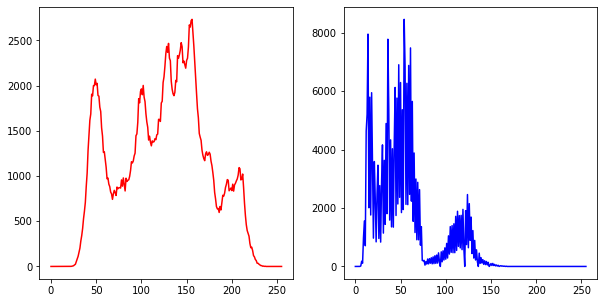

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# a 
# 원본 이미지 불러오기
img = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE) # lena 사진
# img = cv2.imread('c:/data/moon2.jpg', cv2.IMREAD_GRAYSCALE) # 달 사진
# img = cv2.resize(img, (300, 300)) # 사진 크기 조절

cv2.imshow('a', img) # 원본 출력

# 원본에 가우시안 흐림 처리
blur_g = cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=0.0)

# b 
# 라플라시안 함수 사용
# 원본에 라플라시안 바로 적용, 블러 처리한 이미지 보다 미분 오차 증가
laplacian = cv2.Laplacian(img, cv2.CV_32F, ksize=1) # ddepth = 32F
# cv2.imshow('b', laplacian) # 라플라시안 적용된 이미지 출력

# 블러 처리한 이미지에 라플라시안 적용
# 라플라시안 필터를 사용할 때에는 미분 오차 감소를 위해 가우시안 블러 처리를 한 이미지를 사용한다.
# laplacian = cv2.Laplacian(blur_g, cv2.CV_32F, ksize=1)
min, max, lmin, lmax = cv2.minMaxLoc(laplacian)
print('l1: ', min, max, lmin, lmax)

# 직접 구현한 라플라시안 필터에 적용, ksize = 1
# laplacian_kernel = np.array([[0, 1, 0], 
#                       [1, -4, 1], 
#                       [0, 1, 0]])
# laplacian = cv2.filter2D(img, cv2.CV_32F, laplacian_kernel)
cv2.imshow('b', laplacian) # 라플라시안 적용된 이미지 출력

# 라플라시안 정규화
dst = cv2.normalize(laplacian, None, 50, 80, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # 정규화
cv2.imshow('b2', dst) # 정규화 된 이미지 출력

# c 
# 원본에서 라플라시안 필터 값을 뺀
Mlaplacian = cv2.subtract(img, dst)
cv2.imshow('c', Mlaplacian)

# d 
# 원본에 소벨 필터 적용
# opencv 함수 이용한 소벨 필터 적용
sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3) # x 축 미분
sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3) # y 축 미분

# 직접 구현한 소벨 필터 적용
# sobelx_kernel = np.array([[-1, 0, 1], 
#                    [-2, 0, 2],
#                    [-1, 0, 1]])
# sobely_kernel = np.array([[-1, -2, -1], 
#                    [0, 0, 0],
#                    [1, 2, 1]])
# sobelx = cv2.filter2D(img, cv2.CV_32F, sobelx_kernel)
# sobely = cv2.filter2D(img, cv2.CV_32F, sobely_kernel)

mag = cv2.magnitude(sobelx, sobely) # 2D 백터의 크기 계산

sobel = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U) # 정규화
cv2.imshow('d', sobel)


# e 소벨 필터 적용된 이미지를 평균 블러 처리, 5x5
# opencv 함수 이용
sobel_blur = cv2.blur(sobel, ksize=(5, 5))

# 직접 구현
# avg_kernel = np.ones((5,5),np.float32)/25
# sobel_blur = cv2.filter2D(sobel, -1, avg_kernel) # -1은 입력된 영상과 동일한 타입으로 출력
cv2.imshow('e', sobel_blur)

# f 
# 원본과 합칠 이미지 생성
# 라플라시안 필터와 소벨 필터로부터 얻은 이미지를 합치고 임계값 계산
ls = cv2.addWeighted(Mlaplacian, 1, sobel_blur, 1, 0)

# 임계값(threshold) 설정
# TOZERO : 임계값(threshold) 이하인 부분을 0으로 만들기
thresh = 60
_, mask = cv2.threshold(ls, thresh, 255, cv2.THRESH_TOZERO)
# mask = cv2.multiply(Mlaplacian, sobel_blur)
cv2.imshow('f', mask)

# g 
# 원본과 필터 이미지 합치기
sharp = cv2.addWeighted(img, 0.5, mask, 0.5, 0)
cv2.imshow('g', sharp)

# h
# power law 적용 공식: C * r**y
y1 = 0.5 
y2 = 1.2 # 감마 값, 클 수록 어둡다, 낮을 수록 밝다 
y3 = 2.2 
y4 = 3.2 
result = np.array(255*(sharp/255)**y1, dtype='uint8') # dtype='uint8' 고정
result2 = np.array(255*(sharp/255)**y2, dtype='uint8')
result3 = np.array(255*(sharp/255)**y3, dtype='uint8')
result4 = np.array(255*(sharp/255)**y4, dtype='uint8')
cv2.imshow('h1', result) # 개선된 이미지
cv2.imshow('h2', result2)
cv2.imshow('h3', result3)
cv2.imshow('h4', result4)

img_cal = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
result_cal = cv2.calcHist(images=[result2], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(img_cal, color='r')
ax[1].plot(result_cal, color='b') 
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()